## Problem Statement:

### Your neighbour is a real estate agent and wants some help predicting housing prices

### for regions in a city. It would be great if you could somehow create a model for her

### that allows her to put in a few features of a house and returns back an estimate of

### what the house would sell for. She has asked you if you could help her out with your

### new data science skills. Your neighbour then gives you some information about a

### bunch of houses in regions of the city, it is all in the data set: domum.csv.

## Fields in the dataset:

#### 'Avg. Area Income': Avg. Income of residents of the city house is located in. 'Avg. 

#### Area House Age': Avg Age of Houses in same city 

#### 'Avg. Area Number of Rooms': Avg Number of Rooms for Houses in same city 

#### 'Avg. Area Number of Bedrooms': Avg Number of Bedrooms for Houses in same city

#### 'Area Population': Population of city house is located in

#### 'Price': Price that the house sold at

####  'Address': Address for the house.


## understanding problem statement:

#### Whenever a new house with some feautures  comes in,the neighbour(organization) is facing a

#### problem to calculate the prices of the house in a quick time,as  has they to do some calculations

#### and analysis(like comapring it with other houses with same features in the particular area) before 

#### fixing the house(new) price in a particular region , which is difficult  to process manually and it 

#### is very time consuming and some times may lead to errors like getting house prices very low or 

#### high(irrespective of the feautres),which may effect organization business.

#### To over come this problem , the neighbour want a model such that whenever a new 

#### house with certain features comes in it(Model) has to predict the house price based on mentioned 

#### house features by the organization.

#### By building such model the organization can get the the houseprices with less human interuption 

#### which will result in smooth business flow of organization and also reduces manual work which 

#### results in saving of time and capital which will lead to flexible working of the organization.



### Based on the given fields given by the neighbour we has to build a model which can predict the house prices.


In [1]:
# importing required libraries
# to see the output values of Multiple statements as once

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  ## to supress the warnings
%matplotlib inline

plt.style.use('ggplot')
plt.style.use('fivethirtyeight')  ## for better visualizations
sns.set(style='darkgrid')


In [3]:
pd.pandas.set_option('display.max_rows',None)  ## to display all the rows in data set


In [4]:
df=pd.read_csv('domum.csv')   ## df is the name of the data set

In [5]:
df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1  188 Johnson Views Suite 079\nLake Kathleen, CA...  
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                          USS Barnett\nFPO AP 44820  
4                         USNS Raymond\nFPO AE 09386

In [6]:
df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count       5000.000000          5000.000000                5000.000000   
mean       68583.108984             5.977222                   6.987792   
std        10657.991214             0.991456                   1.005833   
min        17796.631190             2.644304                   3.236194   
25%        61480.562388             5.322283                   6.299250   
50%        68804.286404             5.970429                   7.002902   
75%        75783.338666             6.650808                   7.665871   
max       107701.748378             9.519088                  10.759588   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                   5000.000000      5000.000000  5.000000e+03  
mean                       3.981330     36163.516039  1.232073e+06  
std                        1.234137      9925.650114  3.531176e+05  
min                        2.000000       172.610686  1.593866e+04  
25%                        3.140000     29403.928702  9.975771e+05  
50%                        4.050000     36199.406689  1.232669e+06  
75%                        4.490000     42861.290769  1.471210e+06  
max                        6.500000     69621.713378  2.469066e+06

from the above data i can say that the mean and median of every attribute is almost same

In [7]:
df.keys()  # columns in the dataset

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

#### extracting the city,street,zip code from the Address column 

In [8]:
address=df['Address'].str.split('\n')
address

0       [208 Michael Ferry Apt. 674, Laurabury, NE 370...
1       [188 Johnson Views Suite 079, Lake Kathleen, C...
2       [9127 Elizabeth Stravenue, Danieltown, WI 0648...
3                             [USS Barnett, FPO AP 44820]
4                            [USNS Raymond, FPO AE 09386]
5       [06039 Jennifer Islands Apt. 443, Tracyport, K...
6       [4759 Daniel Shoals Suite 442, Nguyenburgh, CO...
7        [972 Joyce Viaduct, Lake William, TN 17778-6483]
8                             [USS Gilbert, FPO AA 20957]
9                      [Unit 9446 Box 0958, DPO AE 97025]
10      [6368 John Motorway Suite 700, Janetbury, NM 2...
11      [911 Castillo Park Apt. 717, Davisborough, PW ...
12      [209 Natasha Stream Suite 961, Huffmanland, NE...
13      [829 Welch Track Apt. 992, North John, AR 2653...
14                     [PSC 5330, Box 4420, APO AP 08302]
15       [2278 Shannon View, North Carriemouth, NM 84617]
16      [064 Hayley Unions, Nicholsborough, HI 44161-1...
17        [549

In [9]:
zips=[]
for i in address:
    zips.append(i[1].split(', '))
print(zips)

[['Laurabury', 'NE 37010-5101'], ['Lake Kathleen', 'CA 48958'], ['Danieltown', 'WI 06482-3489'], ['FPO AP 44820'], ['FPO AE 09386'], ['Tracyport', 'KS 16077'], ['Nguyenburgh', 'CO 20247'], ['Lake William', 'TN 17778-6483'], ['FPO AA 20957'], ['DPO AE 97025'], ['Janetbury', 'NM 26854'], ['Davisborough', 'PW 78603'], ['Huffmanland', 'NE 52457'], ['North John', 'AR 26532-5136'], ['APO AP 08302'], ['North Carriemouth', 'NM 84617'], ['Nicholsborough', 'HI 44161-1887'], ['New Gregoryshire', 'PW 54755'], ['DPO AE 71255'], ['Stephentown', 'ME 36952-4733'], ['Thomashaven', 'HI 87941-5197'], ['FPO AP 85833'], ['Port Sara', 'TN 24541-2855'], ['Lake Elizabeth', 'IN 90622-0804'], ['West Perry', 'MI 03169-5806'], ['Lewisfort', 'DE 61227'], ['Jacksonhaven', 'AZ 72798'], ['West Cynthia', 'MA 89075-2814'], ['Susanshire', 'MN 22365'], ['Lake Robertfurt', 'AL 61811-3832'], ['Courtneyfort', 'NY 93065-7224'], ['Pierceview', 'NV 62614-9110'], ['Lake Emily', 'VA 39465-6041'], ['Emilyville', 'ID 27442'], ['Ta

In [10]:
city=[]
for j in zips:
    city.append(j[0])
print(city)

['Laurabury', 'Lake Kathleen', 'Danieltown', 'FPO AP 44820', 'FPO AE 09386', 'Tracyport', 'Nguyenburgh', 'Lake William', 'FPO AA 20957', 'DPO AE 97025', 'Janetbury', 'Davisborough', 'Huffmanland', 'North John', 'APO AP 08302', 'North Carriemouth', 'Nicholsborough', 'New Gregoryshire', 'DPO AE 71255', 'Stephentown', 'Thomashaven', 'FPO AP 85833', 'Port Sara', 'Lake Elizabeth', 'West Perry', 'Lewisfort', 'Jacksonhaven', 'West Cynthia', 'Susanshire', 'Lake Robertfurt', 'Courtneyfort', 'Pierceview', 'Lake Emily', 'Emilyville', 'Taylorborough', 'Morrishaven', 'Port Raymondville', 'East Judy', 'DPO AP 70848', 'Lake Martha', 'Loriport', 'Lake Kevin', 'North Victoria', 'Davidsonstad', 'West Deborah', 'Brooketown', 'Devonfurt', 'DPO AP 04678', 'Anthonybury', 'New Richard', 'Mooneyborough', 'Danielsside', 'West John', 'South Julieton', 'Scotttown', 'Lake Jacqueline', 'Suzannefurt', 'Jamesport', 'Hohaven', 'North James', 'New Roberttown', 'Thompsonside', 'APO AA 58696-1278', 'Mcculloughfurt', 'So

In [11]:
street=[]
for i in address:
    street.append(i[0])
print(street)

len(street)
    

['208 Michael Ferry Apt. 674', '188 Johnson Views Suite 079', '9127 Elizabeth Stravenue', 'USS Barnett', 'USNS Raymond', '06039 Jennifer Islands Apt. 443', '4759 Daniel Shoals Suite 442', '972 Joyce Viaduct', 'USS Gilbert', 'Unit 9446 Box 0958', '6368 John Motorway Suite 700', '911 Castillo Park Apt. 717', '209 Natasha Stream Suite 961', '829 Welch Track Apt. 992', 'PSC 5330, Box 4420', '2278 Shannon View', '064 Hayley Unions', '5498 Rachel Locks', 'Unit 7424 Box 2786', '19696 Benjamin Cape', '030 Larry Park Suite 665', 'USNS Brown', '95198 Ortiz Key', '9003 Jay Plains Suite 838', '24282 Paul Valley', '61938 Brady Falls', '3599 Ramirez Springs', '073 Christopher Falls Suite 882', '6531 Chase Prairie Apt. 245', '17124 Johnson Squares', '1359 Mitchell Vista', '4343 Joshua Lake Suite 096', '0057 Jacob Coves Apt. 932', '039 Jordan Pike', '66338 Novak Curve Suite 628', '7167 Angela Park Suite 013', '34964 Sara Fields Apt. 584', '7585 Lynn Loop', 'Unit 1388 Box 9350', '9932 Eric Circles', '7

5000

In [12]:
df['street']=street
df['city']=city

In [13]:
df.head()


Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population         Price  \
0                          4.09     23086.800503  1.059034e+06   
1                          3.09     40173.072174  1.505891e+06   
2                          5.13     36882.159400  1.058988e+06   
3                          3.26     34310.242831  1.260617e+06   
4                          4.23     26354.109472  6.309435e+05   

                                             Address  \
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...   
1  188 Johnson Views Suite 079\nLake Kathleen, CA...   
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...   
3                          USS Barnett\nFPO AP 44820   
4                         USNS Raymond\nFPO AE 09386   

                        street           city  
0   208 Michael Ferry Apt. 674      Laurabury  
1  188 Johnson Views Suite 079  Lake Kathleen  
2     9127 Elizabeth Stravenue     Danieltown  
3                  USS Barnett   FPO AP 44820  
4                 USNS Raymond   FPO AE 09386

#### in city column, some cities were missing

In [14]:
df.drop('Address',axis=1,inplace=True)  ## dropping address column


In [15]:
df['street'].describe()

count              5000
unique             4982
top       USCGC Johnson
freq                  4
Name: street, dtype: object

In [16]:
df['city'].describe()

count          5000
unique         4420
top       West John
freq              7
Name: city, dtype: object

#### there are different cities and streets which means the organization business is expanded in almost 4500+ cities..

## checking for null values

In [17]:
df.isna().sum()              

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
street                          0
city                            0
dtype: int64

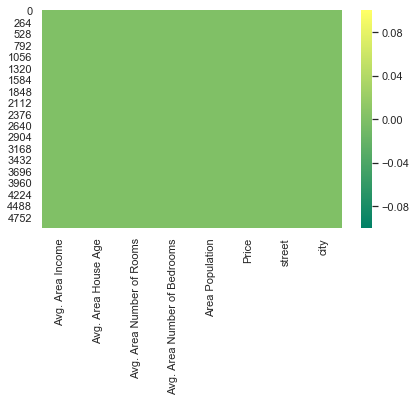

In [18]:
sns.heatmap(df.isna(),cmap='summer')      ## no null values in the data set

## checking for outliers in the given columns

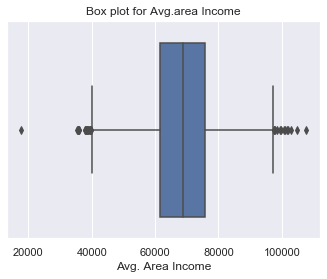

In [19]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Avg. Area Income'])
plt.title('Box plot for Avg.area Income')
plt.show();

### box plot for Avg area income indicates presence of outliers,this might be because differnece in earning potentials of different individuals in different areas

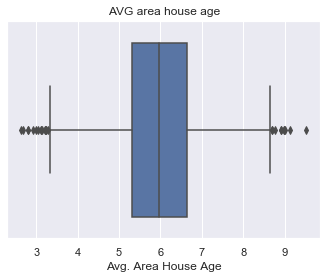

In [20]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Avg. Area House Age'])
plt.title('AVG area house age')
plt.show();

### it indicates presence of outliers,because there may be some old houses as well as new houses in the given areas

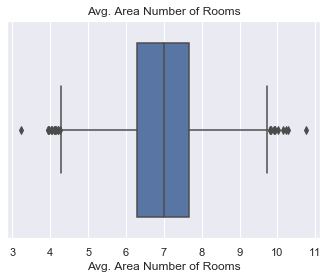

In [21]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Avg. Area Number of Rooms'])
plt.title('Avg. Area Number of Rooms')
plt.show();

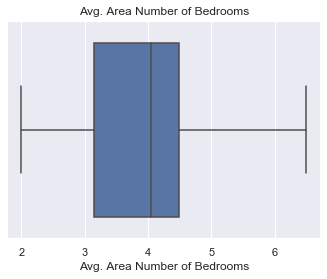

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Avg. Area Number of Bedrooms'])
plt.title('Avg. Area Number of Bedrooms')
plt.show();

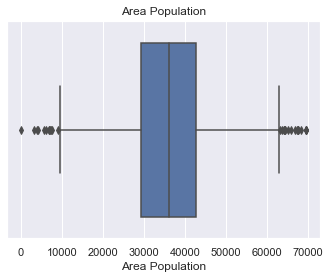

In [23]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Area Population'])
plt.title('Area Population')
plt.show();

### it shows that some areas may have less population as well as high population

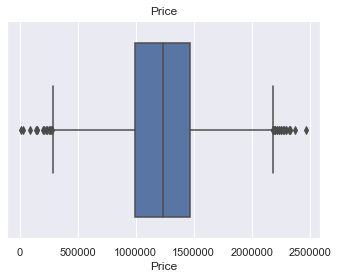

In [24]:
plt.figure(figsize=(5,4))
sns.boxplot(df['Price'])
plt.title('Price')
plt.show();

the box plot indicates presence of outliers,due to differnece in Prices of houses at different areas

For further analysis of data i am removing outliers by using capping technique.

In [25]:
df.drop('street',axis=1,inplace=True)
df.drop('city',axis=1,inplace=True)

In [26]:
for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    ub=q3+((1.5)*iqr)
    lb=q1-((1.5)*iqr)
    
    df[i]=df[i].replace(df[df[i]>ub][i],df[i].quantile(0.99))
    df[i]=df[i].replace(df[df[i]<lb][i],df[i].quantile(0.01))

<Figure size 720x576 with 0 Axes>

(array([1, 2, 3, 4, 5, 6]), <a list of 6 Text xticklabel objects>)

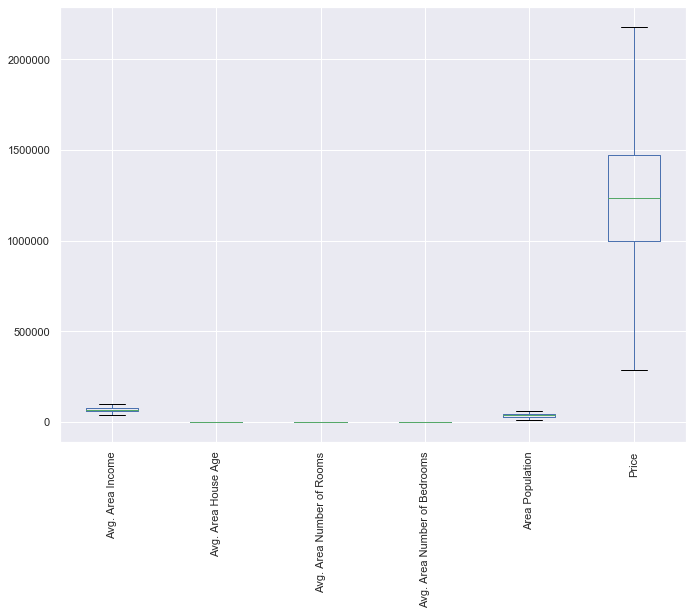

In [27]:
plt.figure(figsize=(10,8))
df.boxplot()
plt.xticks(rotation=90)

outliers were removed

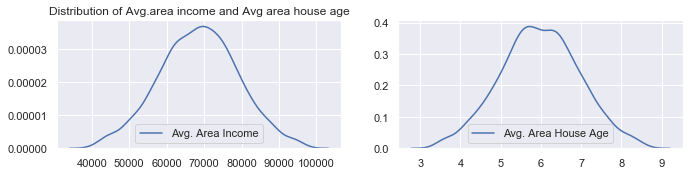

In [28]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,1)
plt.title('Distribution of Avg.area income and Avg area house age')
sns.kdeplot(df['Avg. Area Income'])

plt.subplot(3,2,2)
sns.kdeplot(df['Avg. Area House Age'])

plt.show();



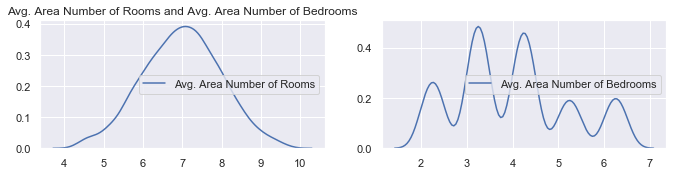

In [29]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,3)
sns.kdeplot(df['Avg. Area Number of Rooms'])
plt.title('Avg. Area Number of Rooms and Avg. Area Number of Bedrooms')

plt.subplot(3,2,4)
sns.kdeplot(df['Avg. Area Number of Bedrooms'])
plt.show();


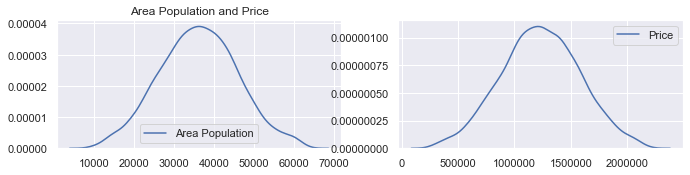

In [30]:
plt.figure(figsize=(10,8))
plt.subplot(3,2,5)
sns.kdeplot(df['Area Population'])

plt.title('Area Population and Price')


plt.subplot(3,2,6)
sns.kdeplot(df['Price'])

plt.show();

### the distribution plots shows that the columns follows almost normal distribution.

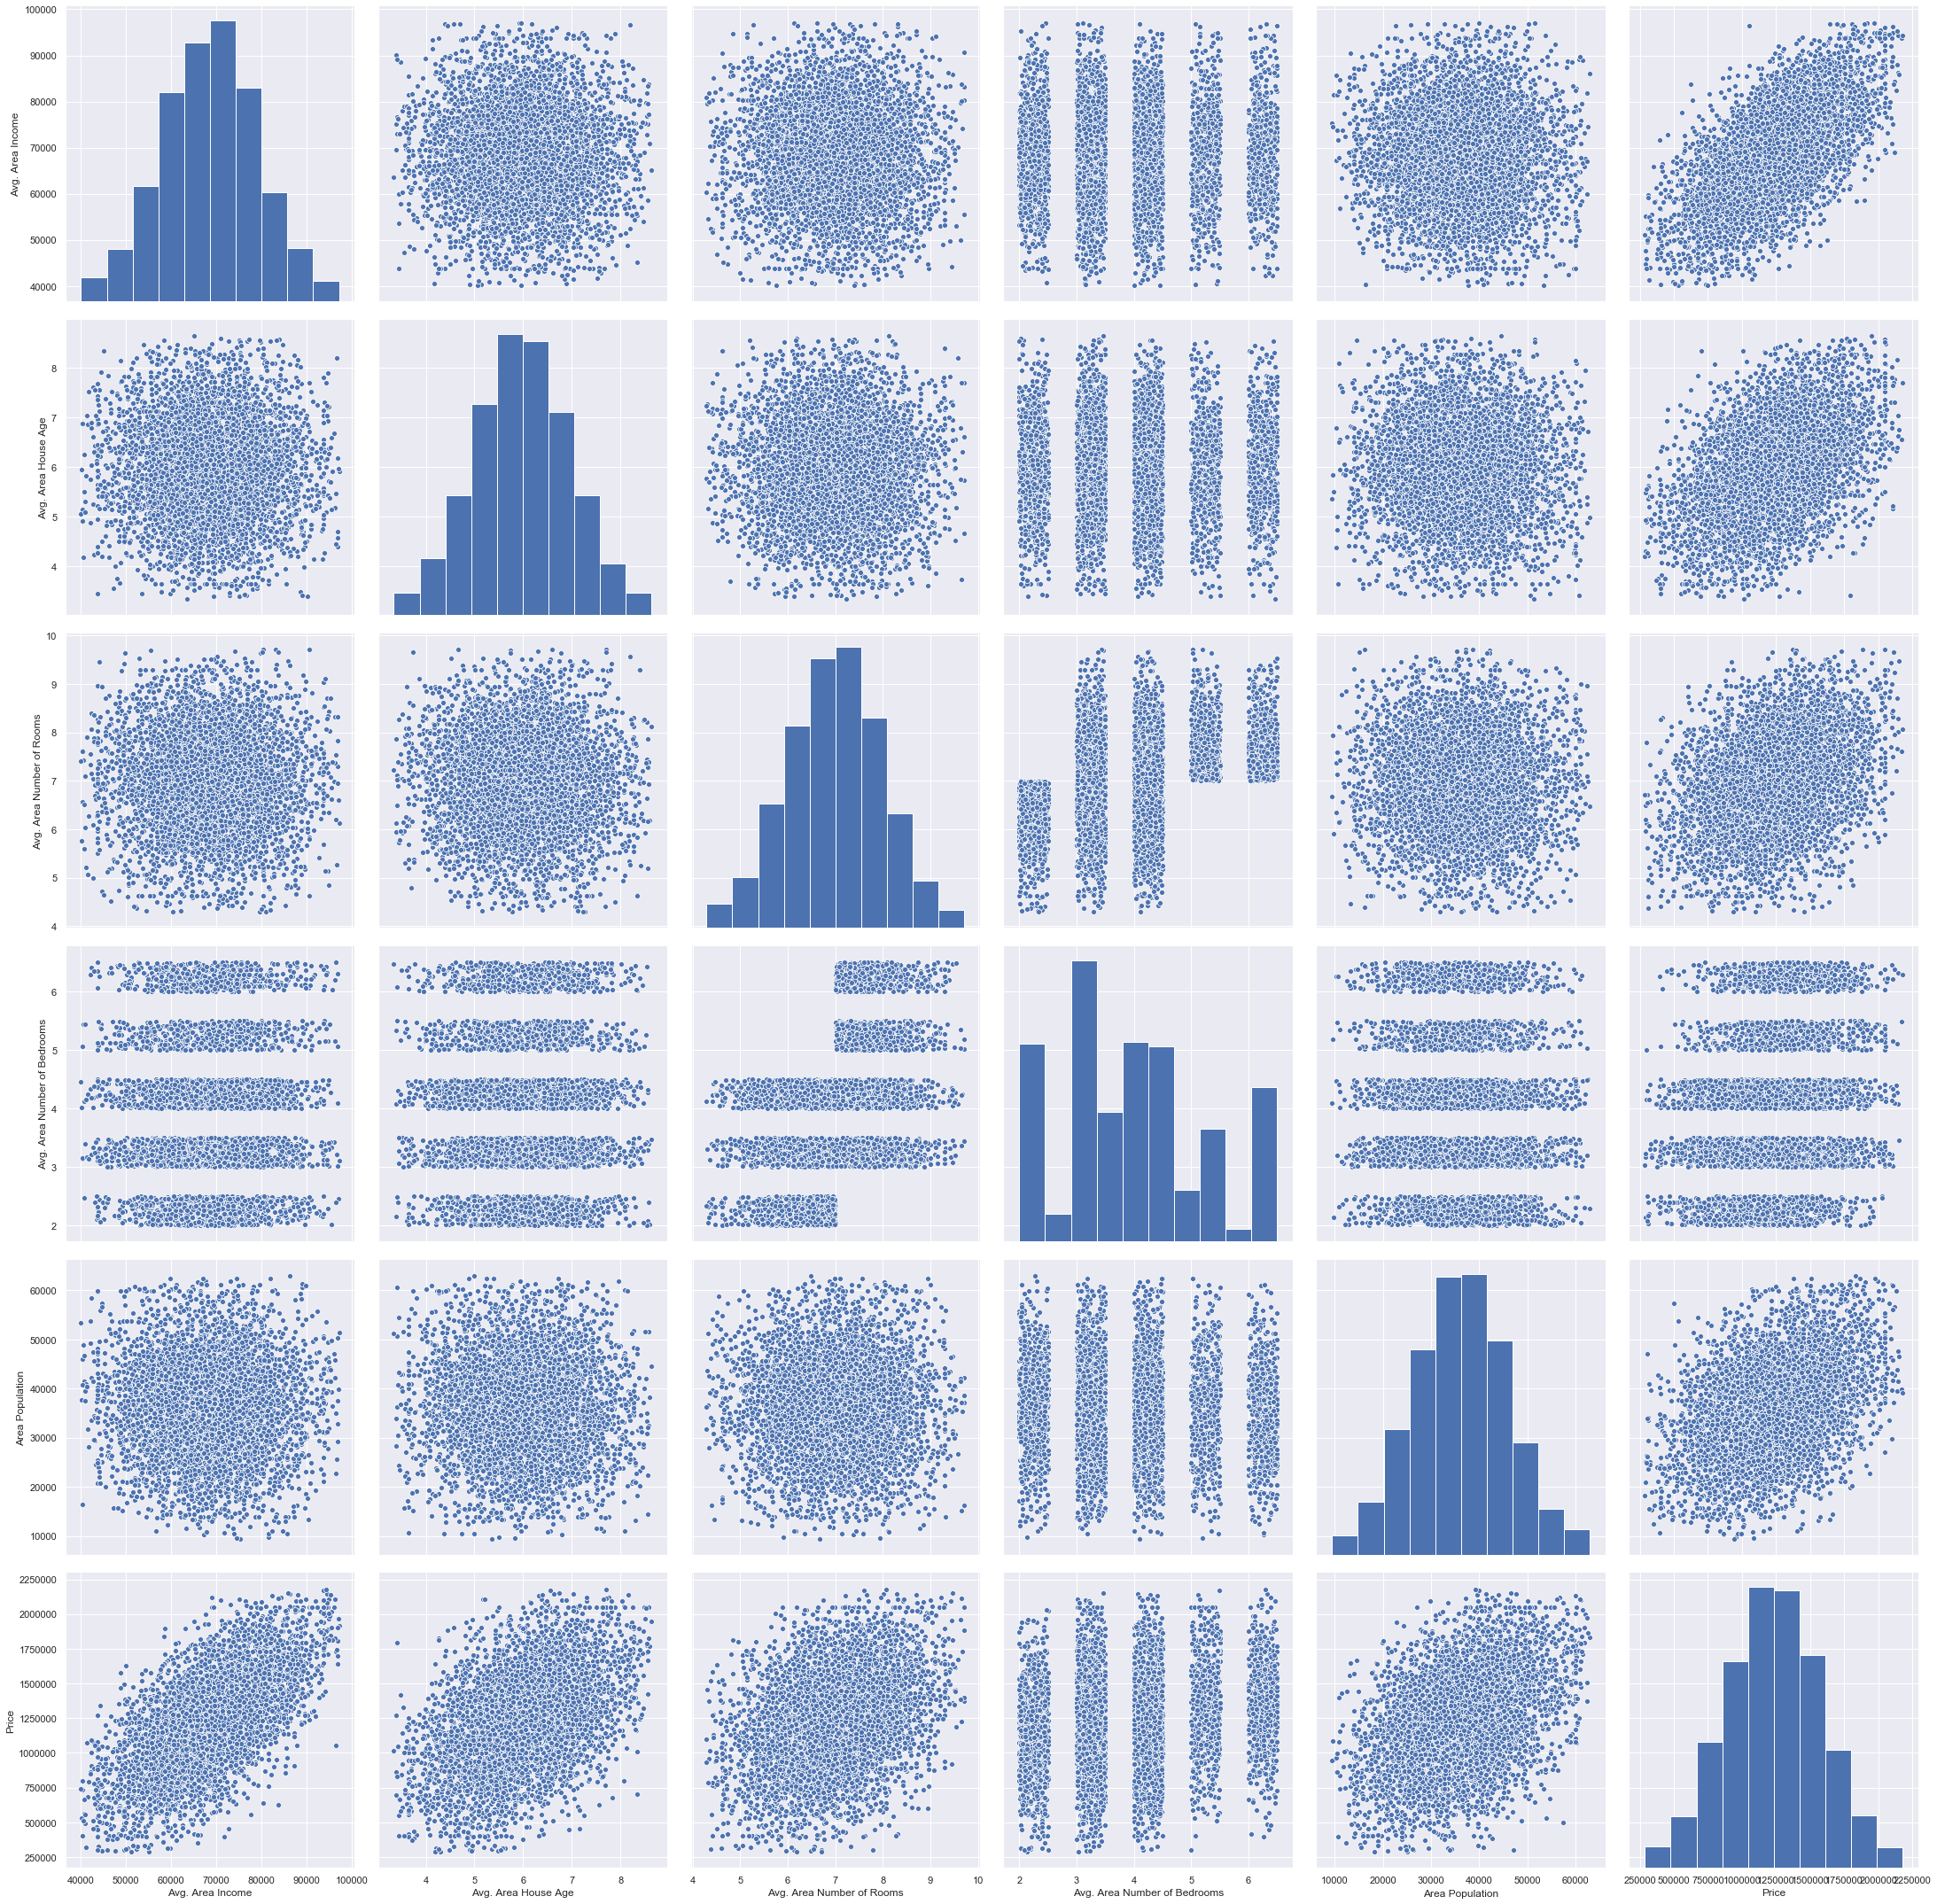

In [31]:
sns.pairplot(df,size=5)

### EDA

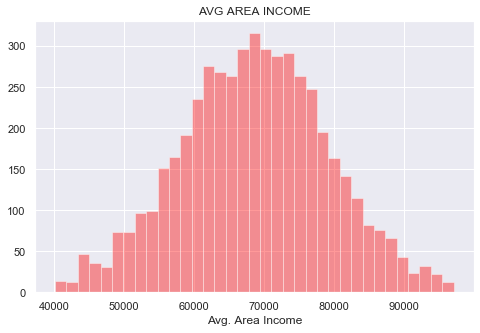

In [32]:
plt.figure(figsize=(7,5))
sns.distplot(df['Avg. Area Income'],kde=False,color='red')
plt.title('AVG AREA INCOME')
plt.show();

most of the house prices ranges from 60000 to 80000
There are areas in which area income
is more than 90000 and 40000


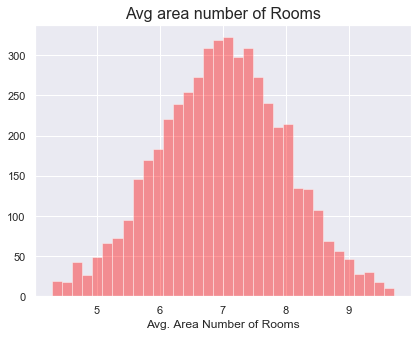

In [33]:
plt.figure(figsize=(6,5))
sns.distplot(df['Avg. Area Number of Rooms'],kde=False,color='Red')
plt.title('Avg area number of Rooms',fontsize=16)
plt.show();

In most of the places Avg area number of rooms ranges from 6 to 8
there are places in which number of rooms were less than 5 and more than 9


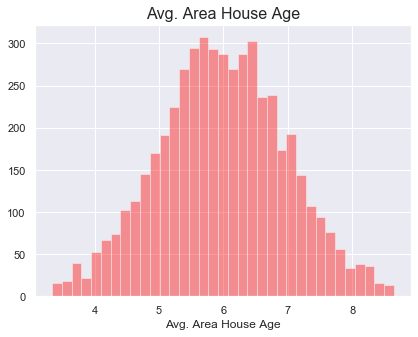

In [34]:
plt.figure(figsize=(6,5))
sns.distplot(df['Avg. Area House Age'],kde=False,color='Red')
plt.title('Avg. Area House Age',fontsize=16)

plt.show();

In most of the places the Avg area house age ranges from 5 to 7 years there 
are places in which the house age was more than 8.5 and less than 1 years


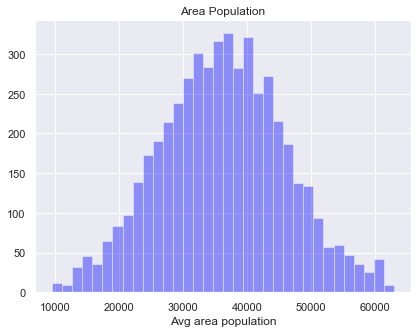

In [35]:
plt.figure(figsize=(6,5))
sns.distplot(df['Area Population'],kde=False,color='Blue')
plt.title('Area Population')
plt.xlabel('Avg area population')
plt.show();

In most of the places the Area population lies between 25000 to 50000
few places where population is more than 60000 and near to 10000


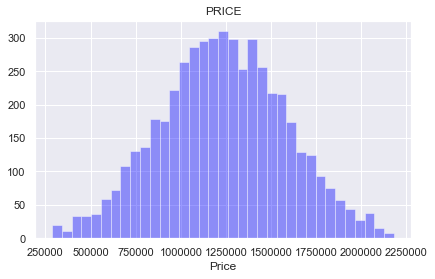

In [36]:
plt.figure(figsize=(6,4))
sns.distplot(df['Price'],kde=False,color='Blue')
plt.title('PRICE')
plt.xlabel('Price')
plt.show();


most of the house prices ranges from 750000 to 1750000 there are few
places in which house prices are more than 2250000 and less than 500000


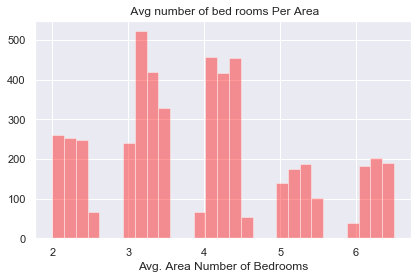

In [37]:
plt.figure(figsize=(6,4))
sns.distplot(df['Avg. Area Number of Bedrooms'],kde=False,color='red')
plt.title(' Avg number of bed rooms Per Area')
plt.show();

In most of the areas the Avg.number of bed rooms lies between 3 to 4.5

There are places where the Avg.number of bed room are more than 5 and less than 3

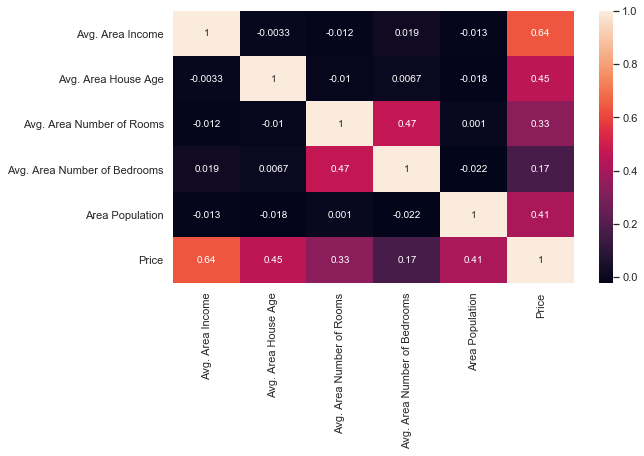

In [38]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.show();

Avg area income,Avg area house age,Area Population seems to be highly correlated with Price

In [39]:
income=df['Avg. Area Income'].values
house_age=df['Avg. Area House Age']
price=df['Price']

In [40]:
from mpl_toolkits.mplot3d import Axes3D

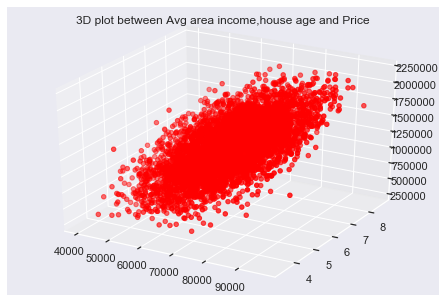

In [41]:
fig=plt.figure()
ax=Axes3D(fig)
ax.scatter(income,house_age,price,color='red')
plt.title('3D plot between Avg area income,house age and Price')
plt.show();

price depends on the avg_area income and avg_area house age

<Figure size 576x360 with 0 Axes>

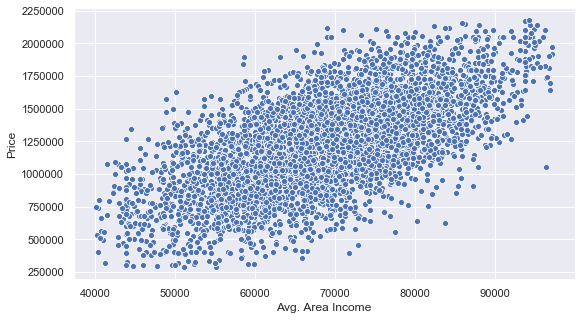

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Avg. Area Income'],df['Price'])

from the above plot,i can say that when the Avg.area income increases House price also increases


<Figure size 576x360 with 0 Axes>

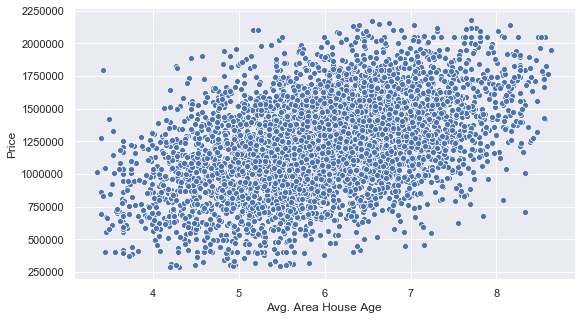

In [43]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Avg. Area House Age'],df['Price'])

Avg Area house age also contributes to the change in House price,as the price changes from old house to new house

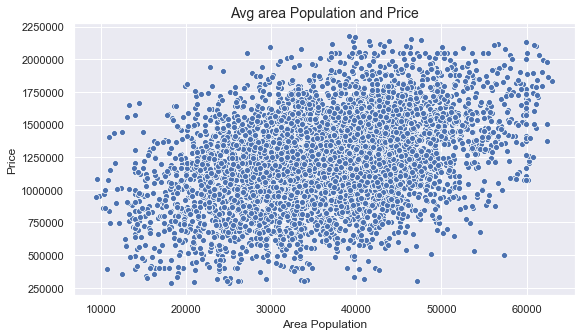

In [44]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Area Population'],df['Price'])
plt.title('Avg area Population and Price',fontsize=14)
plt.show();

Area population and Price are correlated and Area population some how contributes to the price change.

<Figure size 576x360 with 0 Axes>

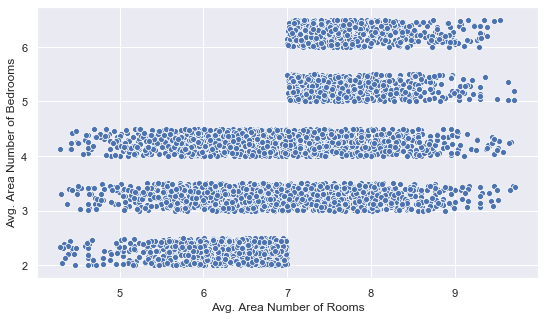

In [45]:
plt.figure(figsize=(8,5))
sns.scatterplot(df['Avg. Area Number of Rooms'],df['Avg. Area Number of Bedrooms'])

In [46]:
#df['Avg. Area Number of Rooms'].value_counts().sort_values(ascending=False)

The avg.number of rooms changes(different) from area to area.

The avg.number of bed rooms also comes under avg.number of rooms means bed rooms are also part of  number of rooms in a house.

In [47]:
df[['Avg. Area Number of Rooms','Avg. Area Number of Bedrooms']].corr()

Avg. Area Number of Rooms  \
Avg. Area Number of Rooms                       1.00000   
Avg. Area Number of Bedrooms                    0.46507   

                              Avg. Area Number of Bedrooms  
Avg. Area Number of Rooms                          0.46507  
Avg. Area Number of Bedrooms                       1.00000

There exists some correlation between number of rooms and number of bed rooms

In [48]:
data=df.groupby('Avg. Area Number of Bedrooms')['Price'].mean().sort_values(ascending=False)
data=data.reset_index()
data

Avg. Area Number of Bedrooms         Price
0                            5.14  1.586711e+06
1                            5.50  1.584794e+06
2                            5.15  1.536191e+06
3                            6.32  1.523839e+06
4                            6.24  1.521457e+06
5                            6.10  1.500380e+06
6                            5.46  1.495660e+06
7                            6.21  1.484116e+06
8                            5.24  1.479250e+06
9                            6.30  1.459774e+06
10                           6.17  1.456489e+06
11                           5.26  1.456102e+06
12                           6.23  1.450321e+06
13                           5.29  1.438164e+06
14                           5.01  1.422858e+06
15                           5.30  1.417747e+06
16                           6.16  1.412935e+06
17                           5.43  1.411182e+06
18                           5.35  1.400044e+06
19                           6.45  1.399247e+06
20                           5.22  1.398175e+06
21                           6.15  1.396967e+06
22                           5.37  1.393380e+06
23                           6.04  1.391699e+06
24                           6.39  1.389770e+06
25                           6.29  1.388045e+06
26                           6.42  1.383938e+06
27                           6.20  1.377853e+06
28                           5.09  1.376241e+06
29                           5.27  1.375004e+06
30                           5.45  1.373197e+06
31                           6.06  1.372603e+06
32                           5.42  1.372085e+06
33                           5.44  1.371032e+06
34                           6.12  1.370951e+06
35                           3.01  1.370747e+06
36                           5.17  1.370029e+06
37                           6.40  1.369672e+06
38                           6.03  1.369005e+06
39                           3.33  1.367179e+06
40                           6.37  1.361845e+06
41                           5.06  1.361739e+06
42                           5.25  1.359701e+06
43                           6.08  1.357390e+06
44                           5.11  1.351872e+06
45                           5.28  1.350676e+06
46                           6.49  1.350158e+06
47                           3.37  1.348634e+06
48                           4.20  1.347472e+06
49                           6.28  1.343827e+06
50                           5.16  1.342906e+06
51                           6.48  1.342157e+06
52                           6.11  1.337133e+06
53                           5.47  1.336914e+06
54                           3.15  1.334817e+06
55                           6.18  1.334555e+06
56                           5.20  1.332989e+06
57                           6.50  1.332707e+06
58                           5.40  1.330070e+06
59                           5.18  1.328942e+06
60                           6.14  1.327902e+06
61                           4.05  1.324753e+06
62                           6.19  1.324405e+06
63                           6.31  1.324263e+06
64                           6.38  1.324210e+06
65                           4.33  1.324053e+06
66                           5.32  1.322297e+06
67                           6.43  1.321223e+06
68                           3.27  1.320946e+06
69                           4.11  1.317781e+06
70                           5.21  1.312078e+06
71                           4.32  1.307677e+06
72                           6.34  1.306606e+06
73                           5.04  1.305890e+06
74                           3.49  1.305373e+06
75                           5.02  1.302197e+06
76                           5.41  1.301524e+06
77                           6.47  1.301314e+06
78                           2.42  1.297967e+06
79                           3.19  1.297119e+06
80                           3.23  1.294978e+06
81                           2.28  1.294551e+06
82                   

from the above result we can say that,even if the Avg.Area bed rooms are high in number in some areas ,the price is not high.

in some areas if the Avg.area number of bed rooms are low ,the price is higher.


In [49]:
data=df.groupby('Avg. Area Number of Bedrooms')['Area Population'].mean().sort_values(ascending=False)
data=data.reset_index()
data

Avg. Area Number of Bedrooms  Area Population
0                            2.09     45835.507208
1                            6.24     44074.532142
2                            5.24     43226.296182
3                            2.28     42393.283529
4                            6.21     41905.344448
5                            2.48     41389.048983
6                            4.11     41306.246659
7                            2.23     41164.695327
8                            5.50     40997.631887
9                            5.43     40596.969333
10                           6.10     40549.490835
11                           6.12     40518.226749
12                           4.14     40164.688705
13                           2.47     40093.826584
14                           5.42     40055.820991
15                           3.10     39885.431496
16                           5.29     39866.772731
17                           4.40     39699.155936
18                           3.19     39674.585993
19                           5.47     39621.183132
20                           2.12     39600.442750
21                           6.42     39598.084495
22                           5.32     39595.671879
23                           5.44     39314.233106
24                           3.27     39132.840304
25                           4.05     38996.908107
26                           3.30     38791.676344
27                           3.49     38671.481611
28                           2.29     38567.322507
29                           3.45     38507.665834
30                           2.30     38504.922498
31                           6.32     38385.527507
32                           3.47     38384.110311
33                           2.50     38364.726561
34                           3.18     38353.990223
35                           3.03     38282.061001
36                           2.00     38184.692529
37                           5.28     38170.276921
38                           4.27     38154.729500
39                           6.40     38140.591974
40                           2.04     38027.595816
41                           4.22     38011.286332
42                           6.13     37948.304134
43                           4.24     37909.479036
44                           5.14     37883.529210
45                           4.33     37856.490016
46                           6.28     37850.094032
47                           2.35     37820.417075
48                           2.03     37810.549060
49                           4.06     37758.735875
50                           3.21     37746.807429
51                           3.41     37668.016990
52                           3.15     37646.604395
53                           4.04     37635.169359
54                           5.35     37617.846734
55                           4.23     37564.495633
56                           2.41     37556.144773
57                           3.37     37542.590975
58                           3.07     37480.637150
59                           5.26     37463.677207
60                           2.36     37439.799894
61                           2.17     37435.680305
62                           6.16     37427.146020
63                           3.29     37424.863600
64                           6.14     37412.124227
65                           4.46     37347.890290
66                           5.06     37294.729840
67                           3.06     37294.604738
68                           3.02     37231.953403
69                           6.20     37218.779133
70                           6.05     37180.234593
71                           4.10     37137.961273
72                           4.16     37078.013481
73                           5.22     37031.277192
74                           5.03     36996.344631
75                           3.23     36991.661772
76                           3.34     36952.308142
77                         

Population is not effecting AVg Area number of bedrooms,as observed in the above table in maximum cases if number of Avg bed rooms are high the area population is low and vice vice versa

In [50]:
data=df.groupby('Avg. Area Number of Bedrooms')['Avg. Area Income'].mean().sort_values(ascending=False)
data=data.reset_index()
data

Avg. Area Number of Bedrooms  Avg. Area Income
0                            5.50      78493.788429
1                            5.15      76323.184694
2                            2.42      75180.840638
3                            5.14      75094.955274
4                            3.01      74935.682077
5                            6.10      74589.506948
6                            6.17      74516.339076
7                            5.24      73929.529010
8                            5.46      73701.758511
9                            3.33      73634.981901
10                           6.48      73056.341814
11                           2.24      73050.504412
12                           2.46      72885.248270
13                           6.45      72885.008914
14                           6.06      72725.105847
15                           4.32      72637.530293
16                           4.47      72435.413826
17                           2.29      72280.976486
18                           2.48      72276.430858
19                           4.20      72208.360278
20                           6.23      72183.397461
21                           3.37      72167.536300
22                           2.28      72110.786489
23                           5.43      71858.736966
24                           5.29      71818.056364
25                           6.21      71739.350413
26                           2.15      71709.017859
27                           6.37      71666.390786
28                           2.36      71647.694746
29                           2.43      71595.250916
30                           5.17      71576.301608
31                           6.30      71478.953938
32                           6.31      71427.925976
33                           6.50      71374.410246
34                           6.08      71273.161437
35                           4.26      71260.618752
36                           4.08      71169.208037
37                           6.11      71154.209663
38                           5.37      71135.181393
39                           2.22      71111.101303
40                           4.33      71099.828770
41                           4.17      71096.588722
42                           3.38      71069.727086
43                           6.24      70955.796216
44                           6.28      70954.488109
45                           6.04      70938.437909
46                           4.39      70806.918793
47                           4.49      70775.221515
48                           4.09      70722.812440
49                           3.39      70710.688412
50                           6.29      70589.517196
51                           3.36      70563.825353
52                           2.14      70562.114900
53                           2.38      70561.922578
54                           5.34      70540.520336
55                           5.41      70530.870604
56                           5.48      70520.780488
57                           5.07      70506.220824
58                           4.03      70463.646109
59                           2.41      70458.391808
60                           5.18      70442.448540
61                           3.19      70426.876413
62                           3.23      70407.386027
63                           2.31      70392.881738
64                           5.27      70386.020160
65                           2.44      70356.564636
66                           6.39      70336.854497
67                           5.35      70263.932262
68                           5.33      70260.425851
69                           2.08      70243.124830
70                           2.01      70237.291737
71                           3.09      70197.401191
72                           6.26      70194.554463
73                           6.18      70145.745117
74                           5.22      70104.624334
75                           2.25      70005.342568
7

from the above table,there are cases when the Avg.number of bedrooms are high and Avg area income is also high and vice versa.
and there are few cases when the avg.number of bed room are low,the avg.area income is also low and vice versa.

### since price is our dependent variable,which we have to predict ,which is continuos,we can apply regression algorithm to predict the price.


### Applying Linear regression 

#### since the basic assumption in linear regression is there exists a linear relationship between dependent and independent varaiables.

## model 1

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_squared_error

In [52]:
x=df.drop('Price',axis=1)  ## independent variables
y=df['Price']              ## dependent variable

In [53]:
## splitting training and testing data in 80:20 ratio

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [55]:
model=LinearRegression()

In [56]:
model=model.fit(x_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
model.coef_

array([2.15395116e+01, 1.64993158e+05, 1.19601359e+05, 1.74207917e+03,
       1.52140680e+01])

In [58]:
model.intercept_

-2624276.9523138376

In [59]:
y_predict=model.predict(x_test)

### Residual plot

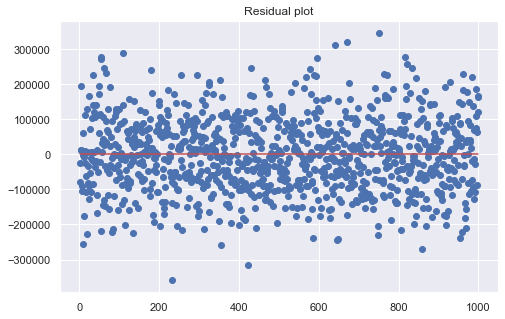

In [60]:
plt.figure(figsize=(7,5))
x=[i for i in range(1,len(y_predict)+1)]
x_plot=plt.scatter(x,(y_test-y_predict),c='b')
plt.plot(x,[0]*len(y_predict),c='r')
plt.title('Residual plot')
plt.show();

#### as residuals are randomly distributed over zero(below and above horizontal line),,we can say that 

#### relationship between independent and dependent variable is linear

In [61]:
mse=np.sqrt(mean_squared_error(y_test,y_predict))
print('mean_squared_error is:' ,mse)
r2score=r2_score(y_test,y_predict)
print('r2score is:' ,r2score)

mean_squared_error is: 104547.56560164122
r2score is: 0.9108515495920101


#### calculating r2_score for trainning set,to check whether there is any overfitting in the model

In [62]:
y_pred=model.predict(x_train)

In [63]:
r2score=r2_score(y_train,y_pred)
r2score

0.9139548861061453

#### the model performs well for the training set as well and there is no any over fitting

#### r2_score is 0.9021 which means 90.214% variance of dependent variable(Price) is explained by independent variables

#### We can say that our model is good enough to predict the house prices using given variables

### Errors distribution

#### one of the main assumptions in linear regression is that the distribution of errors should be normal

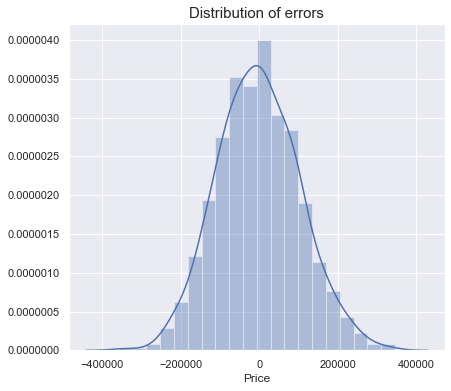

In [64]:
plt.figure(figsize=(6,6))
sns.distplot((y_test-y_predict),bins=20)
plt.title('Distribution of errors',fontsize=15)

plt.show();

## model 2

we found there is correlation exists between two independent varaibles i.e Avg. Area Number of Rooms

and Avg. Area Number of Bedrooms.

#### Hypothesis: from the correlation matrix i observed that the column Avg.area number of bed rooms contributes less to the Price column,dropping  this column may not effect the price



#### I am dropping Avg.Area number of number of bed rooms columns from the data and checking the r2_score

In [65]:
X=df.drop(['Avg. Area Number of Bedrooms','Price'],axis=1)
Y=df['Price']


In [66]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [67]:
df.keys()

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [68]:
model=LinearRegression()

In [69]:
model=model.fit(X_train,Y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
Y_predict=model.predict(X_test)

In [71]:
mse=np.sqrt(mean_squared_error(Y_test,Y_predict))
print('mean_squared_error is:' ,mse)
r2score=r2_score(Y_test,Y_predict)
print('r2score is:' ,r2score)

mean_squared_error is: 104522.16461358282
r2score is: 0.9108948635347797


#### even if i drop Avg.area number of Bedrooms there is no change in r2_score compared to first model r2_score,so i can drop Avg.area number of bed rooms from the data.

#### hence the hypothesis what i assumed  i.e dropping  Avg.area number of bed rooms column may not effect the r2_score, is accepted.

## Residual plot

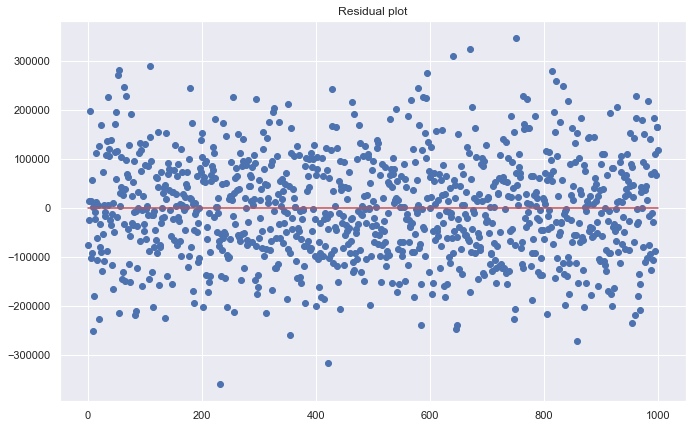

In [72]:
plt.figure(figsize=(10,7))
X=[i for i in range(1,len(Y_predict)+1)]
X_plot=plt.scatter(X,(Y_test-Y_predict),c='b')
plt.plot(X,[0]*len(Y_predict),c='r')
plt.title('Residual plot')
plt.show();

#### as residuals are randomly distributed over zero(below and above horizontal line),,we can say that 

#### relationship between independent and dependent variable is linear

### plotting the error terms.

#### as one of the assumption in linear regression in error terms should follow normal distributution

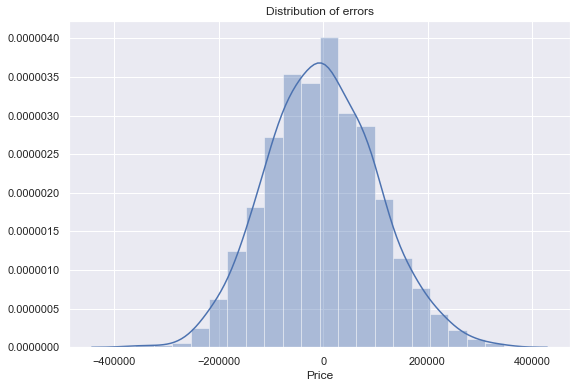

In [73]:
plt.figure(figsize=(8,6))
sns.distplot((Y_test-Y_predict),bins=20)
plt.title('Distribution of errors')
plt.show();

#### the above plot clearly shows error terms follow normal distribution.

### Regularization

In [74]:
ridgeReg=Ridge(alpha=0.04,normalize=True)

ridgeReg.fit(x_train,y_train)

pred=ridgeReg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,pred))

r2=r2_score(y_test,pred)

print('RMSE= ',rmse,'R2= ',r2)

Ridge(alpha=0.04, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

RMSE=  105235.31684296002 R2=  0.9096747909930489


In [75]:
lassoReg=Lasso(alpha=0.01,normalize=True)

lassoReg.fit(x_train,y_train)

pred=lassoReg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,pred))

r2=r2_score(y_test,pred)

print('RMSE= ',rmse,'R2= ',r2)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

RMSE=  104547.51154875229 R2=  0.9108516417745495


#### there is no change in accuracy after applying regularization i.e.Ridge and lasso Regression

#### we have found that the columns  'Avg. Area Income' , 'Avg. Area House Age', shows more correlation with the variable Price,compared to other variables.so lets Build a model using these 2 columns and check the r2_score

In [76]:
a=df[['Avg. Area Income','Avg. Area House Age']]
b=df['Price']

In [77]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.25,random_state=101)

reg=LinearRegression()

reg=reg.fit(x_train,y_train)

In [78]:
pred=reg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,pred))

r2=r2_score(y_test,pred)

print('RMSE= ',rmse,'R2= ',r2)

RMSE=  212643.77114208078 R2=  0.6258563448269503


#### from the above result we can say that the columns 'Avg area income', and 'Avg.area house age' 

#### explains about 62% varaince of the dependent(Price) variable.

#### now adding the column 'Area Population' to the above model,as Area population shows better 

#### correlation with price column after 'Avg area income' and 'Avg area house age'

In [79]:
a=df[['Avg. Area Income','Avg. Area House Age','Area Population']]
b=df['Price']

In [80]:
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.25,random_state=101)

reg=LinearRegression()

reg=reg.fit(x_train,y_train)

In [81]:
pred=reg.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,pred))

r2=r2_score(y_test,pred)

print('RMSE= ',rmse,'R2= ',r2)

RMSE=  160100.28788199514 R2=  0.7879114225997014


#### from the above result we can say that about 78% variance in dependent varaiable (Price) is   

#### explained only by three variables i.e.. 'Avg. Area Income','Avg. Area House Age','Area 

#### Population'.which shows that Price is heavily effected by these three features in the given data set.

## model 3

#### Applying standardization technique on the data,to see whether the r2_score will increase or not

#### The standardization rescales the features so that they will have the properties of the standard normal distribution with μ = 0 and σ = 1

In [82]:
from sklearn.preprocessing import StandardScaler

In [83]:
scaler=StandardScaler()

In [84]:
scaled_data=scaler.fit_transform(df)

In [85]:
scaled_df=pd.DataFrame(scaled_data)

In [86]:
scaled_df.columns=df.columns

In [87]:
scaled_df.head()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0          1.040134            -0.300064                   0.021589   
1          1.011952             0.025637                  -0.257630   
2         -0.693501            -0.113797                   1.529728   
3         -0.498077             1.231943                  -1.405222   
4         -0.817398            -0.953734                   0.854329   

   Avg. Area Number of Bedrooms  Area Population     Price  
0                      0.088062        -1.333379 -0.495056  
1                     -0.722301         0.409380  0.785339  
2                      0.930840         0.073715 -0.495186  
3                     -0.584540        -0.188614  0.082547  
4                      0.201513        -1.000121 -1.721676

In [88]:
scaled_df.describe()

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
count      5.000000e+03         5.000000e+03               5.000000e+03   
mean      -5.971890e-17         5.096163e-16              -1.016109e-15   
std        1.000100e+00         1.000100e+00               1.000100e+00   
min       -2.701267e+00        -2.681728e+00              -2.705723e+00   
25%       -6.751284e-01        -6.670211e-01              -6.905208e-01   
50%        2.025951e-02        -7.408601e-03               1.528383e-02   
75%        6.829209e-01         6.850077e-01               6.802816e-01   
max        2.708113e+00         2.711244e+00               2.736404e+00   

       Avg. Area Number of Bedrooms  Area Population         Price  
count                  5.000000e+03     5.000000e+03  5.000000e+03  
mean                  -2.029016e-16     5.137224e-16 -7.993051e-17  
std                    1.000100e+00     1.000100e+00  1.000100e+00  
min                   -1.605598e+00    -2.720431e+00 -2.706308e+00  
25%                   -6.817833e-01    -6.890467e-01 -6.711489e-01  
50%                    5.564767e-02     4.075718e-03  2.468649e-03  
75%                    4.122077e-01     6.835719e-01  6.859675e-01  
max                    2.041039e+00     2.733975e+00  2.717074e+00

In [89]:
X=scaled_df.drop('Price',axis=1)  ## independent variables
Y=scaled_df['Price'] 

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [91]:
model=LinearRegression()

In [92]:
model=model.fit(X_train,Y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [93]:
model.coef_

array([0.65000358, 0.46454199, 0.34165247, 0.00615975, 0.42739606])

In [94]:
model.intercept_

0.0011845345109658663

In [95]:
Y_predict=model.predict(X_test)

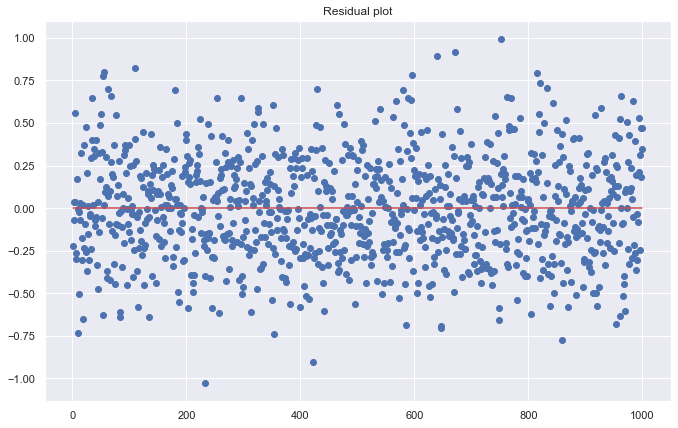

In [96]:
plt.figure(figsize=(10,7))
X=[i for i in range(1,len(Y_predict)+1)]
X_plot=plt.scatter(X,(Y_test-Y_predict),c='b')
plt.plot(X,[0]*len(Y_predict),c='r')
plt.title('Residual plot')
plt.show();

In [97]:
mse=np.sqrt(mean_squared_error(Y_test,Y_predict))
print('mean_squared_error is:' ,mse)
r2score=r2_score(Y_test,Y_predict)
print('r2score is:' ,r2score)

mean_squared_error is: 0.2995635791691936
r2score is: 0.9108515495919858


#### there is no change in accuracy even after applying standardization

### Distribution of errors

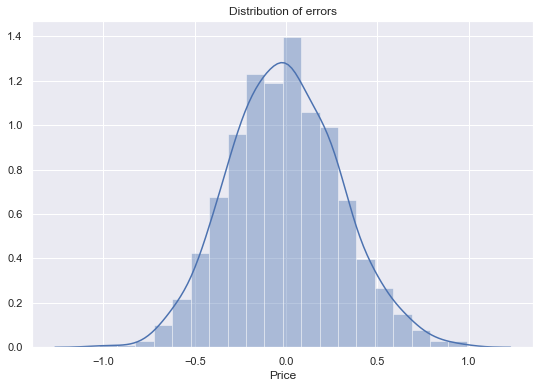

In [98]:
plt.figure(figsize=(8,6))
sns.distplot((Y_test-Y_predict),bins=20)
plt.title('Distribution of errors')
plt.show();

#### the errors follow normal distribtion,which is one of the assumption of linear regression.

### so,i conclude that any of the above models like model1,model2,model3 are good for Predicting the house prices.